<a href="https://colab.research.google.com/github/felinelson/Open-Data-Big-Data/blob/main/Felipe_Nelson_Proyecto_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***¡Bonus Track!***
Análisis de Datos de Spotify: ¡Descifren las
Preferencias Musicales del Mundo!


---


Objetivo: Desentrañar las preferencias musicales de los usuarios de Spotify mediante el
análisis de datos de canciones y escuchas.

**Tareas**

---



#**Preprocesamiento de Datos:** Limpien y preparen los tweets para el análisis, eliminando ruido y normalizando el texto.

In [36]:
import pandas as pd
from google.colab import files

# Subir el archivo CSV
uploaded = files.upload()

# Leer el archivo CSV en un DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Mostrar las primeras filas del DataFrame
print(df.head())

Saving tweetsdataset - train (1).csv to tweetsdataset - train (1).csv
   id  label                                              tweet
0   1      0    when a father is dysfunctional and is so sel...
1   2      0      thanks for #lyft credit i can't use cause ...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [37]:
# Mostar informacion del CSV
print(df.info())

# Mostar estadisticas
print(df.describe())

# Mostrar las primeras lineas
print(df.head())

# Mostrar las columnas
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
                 id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000
   id  label                                              tweet
0   1      0    when a father is dysfunctional and is so sel...
1   2      0      thanks for #lyft credit i can't use cause ...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             fact

In [38]:
# LIMPIEZA
# Ver valores faltantes
print(df.isnull().sum())

# Eliminar filas con valores nulos
df_cleaned = df.dropna()

# Rellenar valores
df_cleaned = df.fillna('')

# Eliminar duplicados
df_cleaned = df_cleaned.drop_duplicates()

# Normalizar texto en columna de tweets
# Convertir todo a minuscula
df_cleaned['tweet'] = df_cleaned['tweet'].str.lower()

# Eliminar espacios grandes en blanco
df_cleaned['tweet'] = df_cleaned['tweet'].str.strip()

# Eliminar caracteres no alfabeticos
df_cleaned['tweet'] = df_cleaned['tweet'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Verificar resultados
print(df_cleaned.info())
print(df_cleaned.head())

id       0
label    0
tweet    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
   id  label                                              tweet
0   1      0  when a father is dysfunctional and is so selfi...
1   2      0  thanks for lyft credit i cant use cause they d...
2   3      0                                bihday your majesty
3   4      0  model   i love u take with u all the time in u...
4   5      0               factsguide society now    motivation


#**Exploración de Datos (EDA):** Visualicen la distribución de tweets por sentimiento, identifiquen palabras clave y hashtags relevantes.

In [14]:
pip install matplotlib seaborn wordcloud nltk

In [39]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from collections import Counter
import nltk
from textblob import TextBlob

nltk.download('punkt')

# Leer el archivo CSV en un DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Verificar las primeras filas del DataFrame
print(df.head())

   id  label                                              tweet
0   1      0    when a father is dysfunctional and is so sel...
1   2      0      thanks for #lyft credit i can't use cause ...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
# Función para obtener el sentimiento de un tweet
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Aplicar la función a la columna de tweets
df['sentiment'] = df['tweet'].apply(get_sentiment)

# Verificar las primeras filas con la nueva columna de sentimiento
print(df.head())

   id  label                                              tweet sentiment
0   1      0    when a father is dysfunctional and is so sel...  negative
1   2      0      thanks for #lyft credit i can't use cause ...  positive
2   3      0                                bihday your majesty   neutral
3   4      0  #model   i love u take with u all the time in ...  positive
4   5      0             factsguide: society now    #motivation   neutral


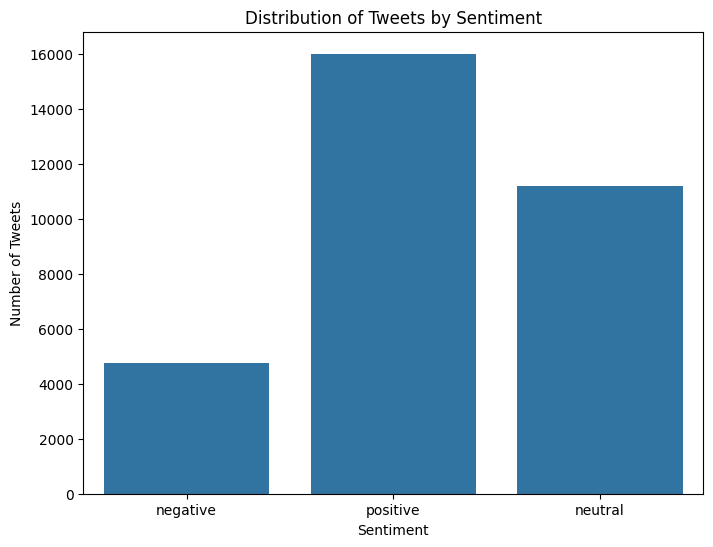

In [41]:
# Visualización de la distribución de tweets por sentimiento
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

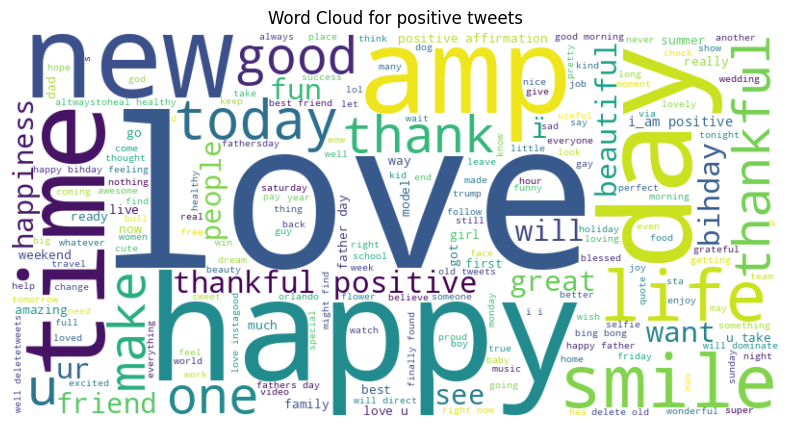

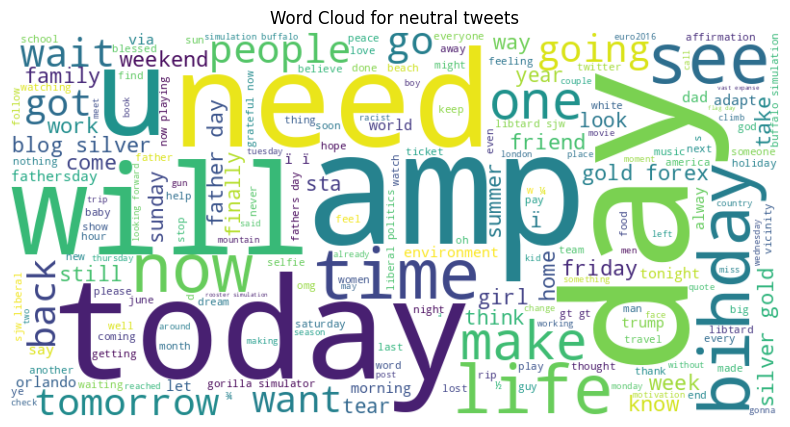

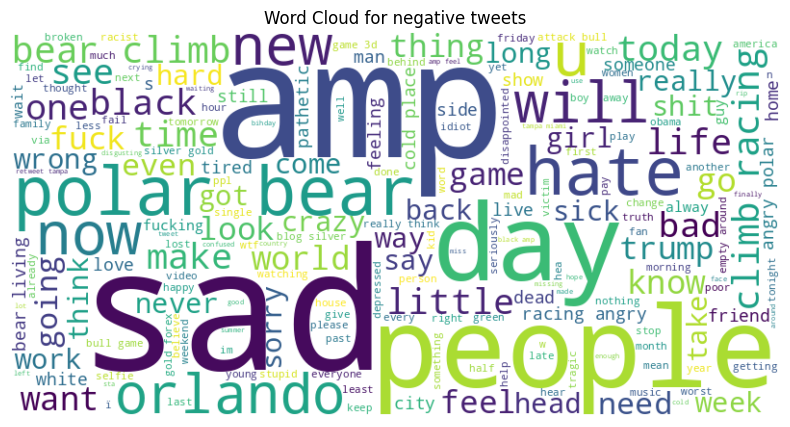

In [42]:
# Función para crear una nube de palabras para cada sentimiento
def plot_wordcloud(sentiment, df):
    text = " ".join(tweet for tweet in df[df['sentiment'] == sentiment].tweet)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} tweets')
    plt.show()

# Crear nubes de palabras para cada sentimiento
plot_wordcloud('positive', df)
plot_wordcloud('neutral', df)
plot_wordcloud('negative', df)

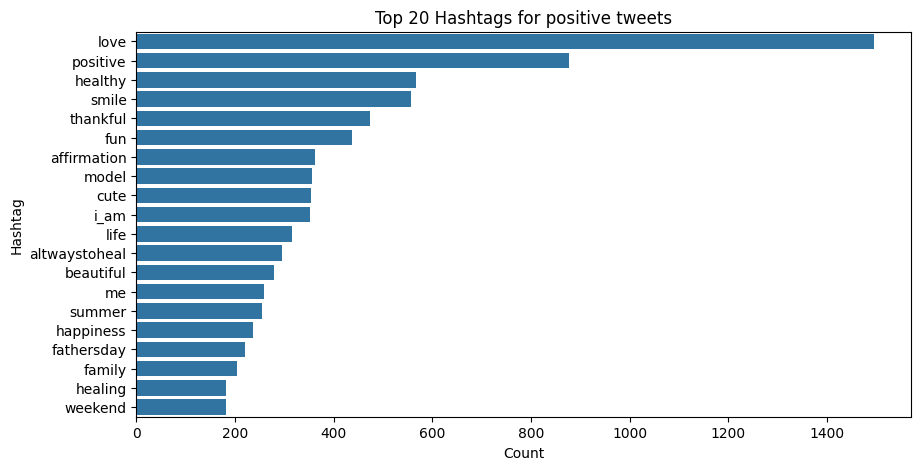

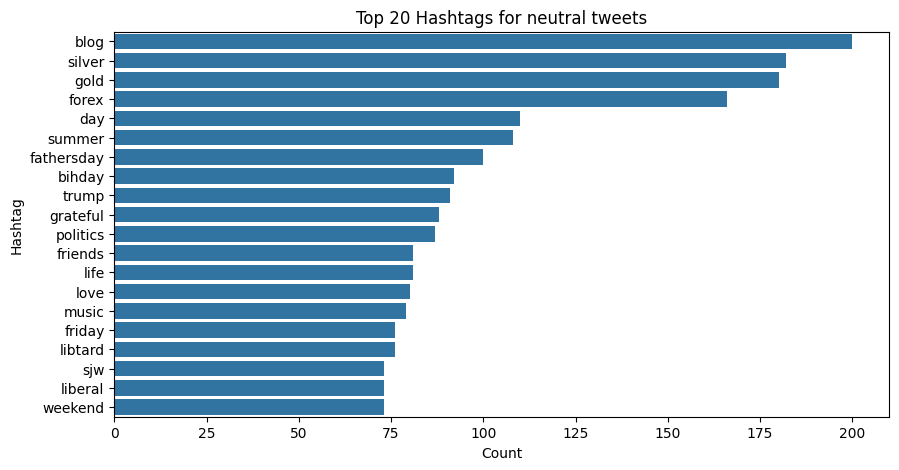

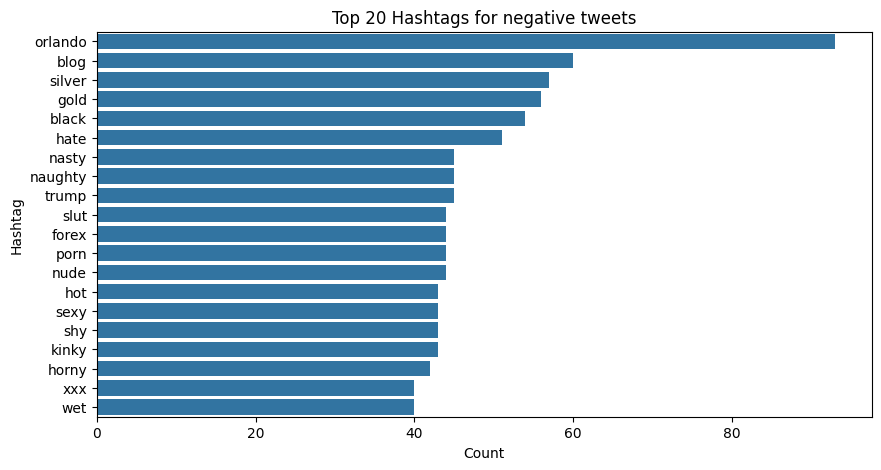

In [43]:
# Función para extraer hashtags
def extract_hashtags(tweet):
    return re.findall(r"#(\w+)", tweet)

# Extraer hashtags y agregarlos a una nueva columna
df['hashtags'] = df['tweet'].apply(extract_hashtags)

# Contar la frecuencia de los hashtags por sentimiento
def hashtag_frequency(sentiment, df):
    all_hashtags = sum(df[df['sentiment'] == sentiment]['hashtags'], [])
    hashtag_freq = Counter(all_hashtags)
    hashtag_df = pd.DataFrame(hashtag_freq.items(), columns=['hashtag', 'count']).sort_values(by='count', ascending=False)
    return hashtag_df

# Visualizar los hashtags más comunes por sentimiento
def plot_hashtags(sentiment, df):
    hashtag_df = hashtag_frequency(sentiment, df)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='hashtag', data=hashtag_df.head(20))
    plt.title(f'Top 20 Hashtags for {sentiment} tweets')
    plt.xlabel('Count')
    plt.ylabel('Hashtag')
    plt.show()

# Crear visualizaciones de hashtags para cada sentimiento
plot_hashtags('positive', df)
plot_hashtags('neutral', df)
plot_hashtags('negative', df)

**Extracción de Características:** Extraigan características relevantes del texto, como palabras clave, emoticones y hashtags.

In [20]:
pip install pandas nltk textblob emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.4 MB/s eta 0:00:00


In [44]:
import pandas as pd
from google.colab import files
import re
import nltk
from collections import Counter
import emoji

# Descargar recursos necesarios para NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Limpiar el texto: convertir a minúsculas, eliminar URLs y caracteres especiales
def clean_tweet(tweet):
    tweet = tweet.lower()  # Convertir a minúsculas
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Eliminar URLs
    tweet = re.sub(r'\@\w+|\#','', tweet)  # Eliminar menciones y hashtags
    tweet = re.sub(r'[^A-Za-z0-9\s]+', '', tweet)  # Eliminar caracteres especiales
    return tweet

df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   id  label                                              tweet sentiment  \
0   1      0    when a father is dysfunctional and is so sel...  negative   
1   2      0      thanks for #lyft credit i can't use cause ...  positive   
2   3      0                                bihday your majesty   neutral   
3   4      0  #model   i love u take with u all the time in ...  positive   
4   5      0             factsguide: society now    #motivation   neutral   

                          hashtags  \
0                            [run]   
1  [lyft, disapointed, getthanked]   
2                               []   
3                          [model]   
4                     [motivation]   

                                       cleaned_tweet  
0    when a father is dysfunctional and is so sel...  
1      thanks for lyft credit i cant use cause th...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4               factsguide societ

In [45]:
# Tokenizar y eliminar stopwords
stop_words = set(stopwords.words('english'))

def get_keywords(tweet):
    words = word_tokenize(tweet)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

df['keywords'] = df['cleaned_tweet'].apply(get_keywords)

# Contar la frecuencia de las palabras clave
all_keywords = sum(df['keywords'], [])
keyword_freq = Counter(all_keywords)

# Mostrar las palabras más comunes
print("Palabras más comunes:")
print(keyword_freq.most_common(20))

Palabras más comunes:
[('love', 2731), ('day', 2261), ('happy', 1697), ('amp', 1603), ('u', 1144), ('im', 1144), ('life', 1130), ('time', 1127), ('like', 1053), ('today', 1010), ('new', 988), ('positive', 934), ('thankful', 925), ('get', 919), ('people', 865), ('bihday', 858), ('good', 850), ('cant', 804), ('one', 783), ('see', 758)]


In [46]:
# Extraer hashtags
def extract_hashtags(tweet):
    return re.findall(r"#(\w+)", tweet)

df['hashtags'] = df['tweet'].apply(extract_hashtags)

# Contar la frecuencia de los hashtags
all_hashtags = sum(df['hashtags'], [])
hashtag_freq = Counter(all_hashtags)

# Mostrar los hashtags más comunes
print("Hashtags más comunes:")
print(hashtag_freq.most_common(20))

Hashtags más comunes:
[('love', 1599), ('positive', 880), ('smile', 580), ('healthy', 577), ('thankful', 496), ('fun', 461), ('life', 430), ('summer', 378), ('model', 366), ('cute', 365), ('affirmation', 363), ('i_am', 352), ('blog', 347), ('me', 341), ('fathersday', 338), ('gold', 301), ('silver', 300), ('altwaystoheal', 295), ('beautiful', 291), ('bihday', 283)]


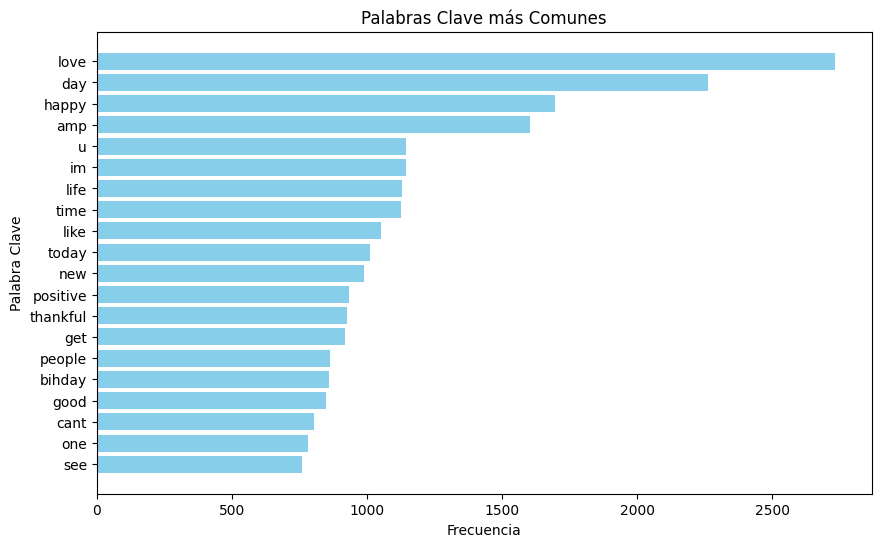

In [47]:
import matplotlib.pyplot as plt

# Obtener las palabras clave más comunes
common_keywords = keyword_freq.most_common(20)

# Preparar datos para el gráfico
keywords, counts = zip(*common_keywords)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(keywords, counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra Clave')
plt.title('Palabras Clave más Comunes')
plt.gca().invert_yaxis()
plt.show()

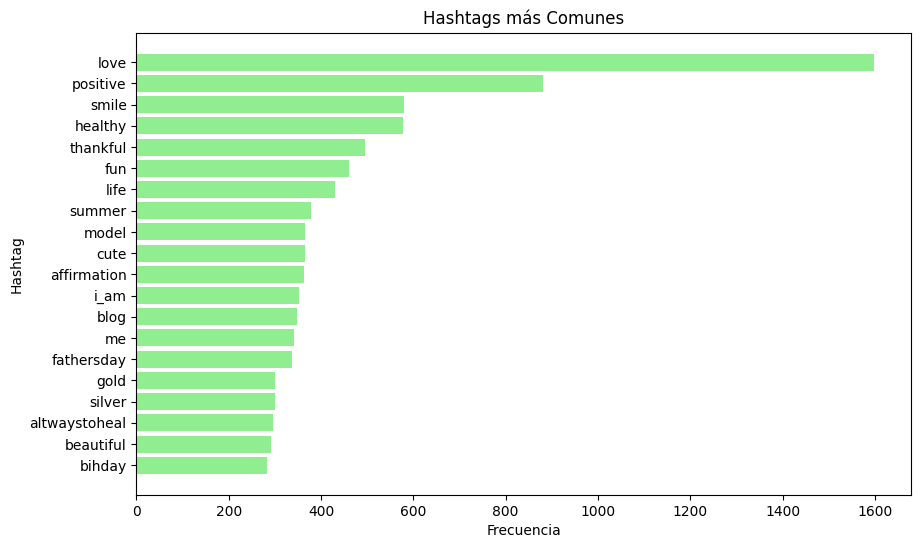

In [48]:
# Obtener los hashtags más comunes
common_hashtags = hashtag_freq.most_common(20)

# Preparar datos para el gráfico
hashtags, counts = zip(*common_hashtags)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(hashtags, counts, color='lightgreen')
plt.xlabel('Frecuencia')
plt.ylabel('Hashtag')
plt.title('Hashtags más Comunes')
plt.gca().invert_yaxis()
plt.show()

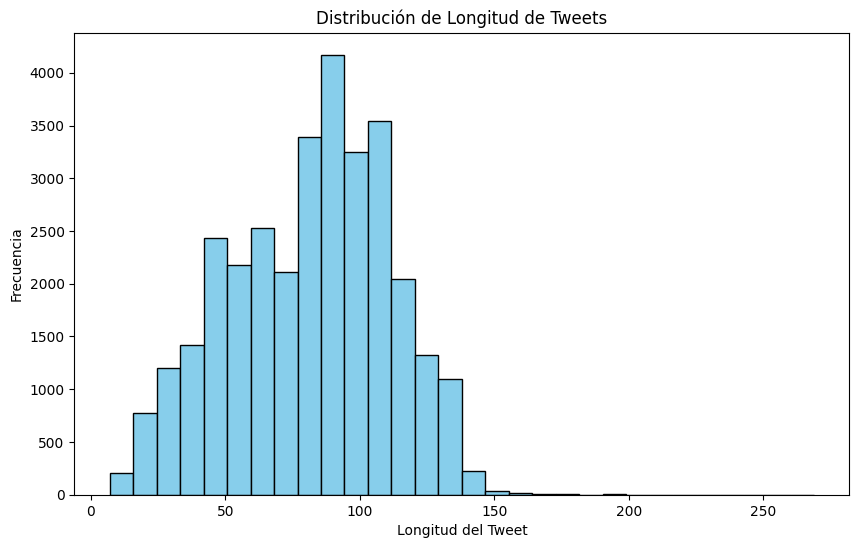

In [49]:
# Calcular la longitud de cada tweet
df['tweet_length'] = df['tweet'].apply(len)

# Crear un histograma de la longitud de los tweets
plt.figure(figsize=(10, 6))
plt.hist(df['tweet_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Longitud del Tweet')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de Tweets')
plt.show()

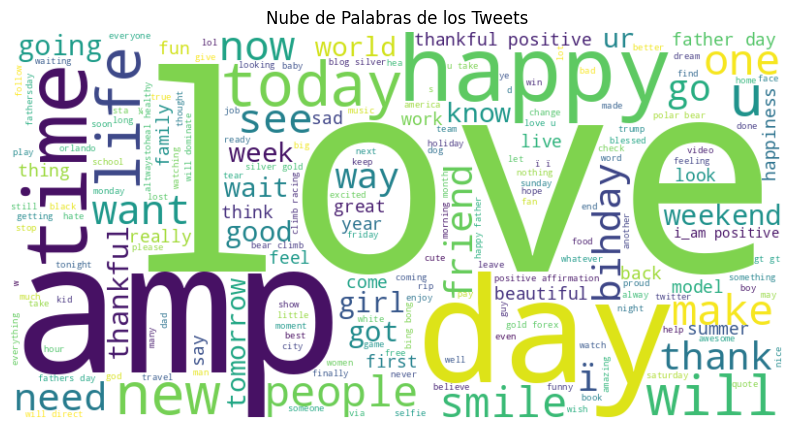

In [50]:
from wordcloud import WordCloud

# Unir todos los tweets en un solo texto
all_tweets = ' '.join(df['tweet'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Tweets')
plt.show()

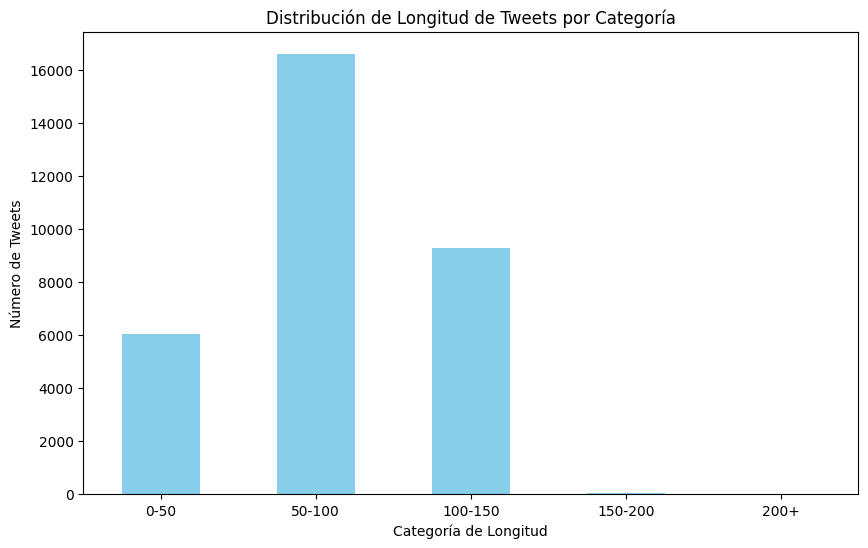

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Calcular la longitud de cada tweet
df['tweet_length'] = df['tweet'].apply(len)

# Definir las categorías de longitud
bins = [0, 50, 100, 150, 200, float('inf')]  # Cambié np.inf por float('inf') para evitar el error
labels = ['0-50', '50-100', '100-150', '150-200', '200+']

# Agrupar los tweets por longitud
df['tweet_length_category'] = pd.cut(df['tweet_length'], bins=bins, labels=labels)

# Contar los tweets en cada categoría
length_category_counts = df['tweet_length_category'].value_counts().sort_index()

# Crear un gráfico de barras para la distribución de longitud de los tweets
plt.figure(figsize=(10, 6))
length_category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría de Longitud')
plt.ylabel('Número de Tweets')
plt.title('Distribución de Longitud de Tweets por Categoría')
plt.xticks(rotation=0)
plt.show()

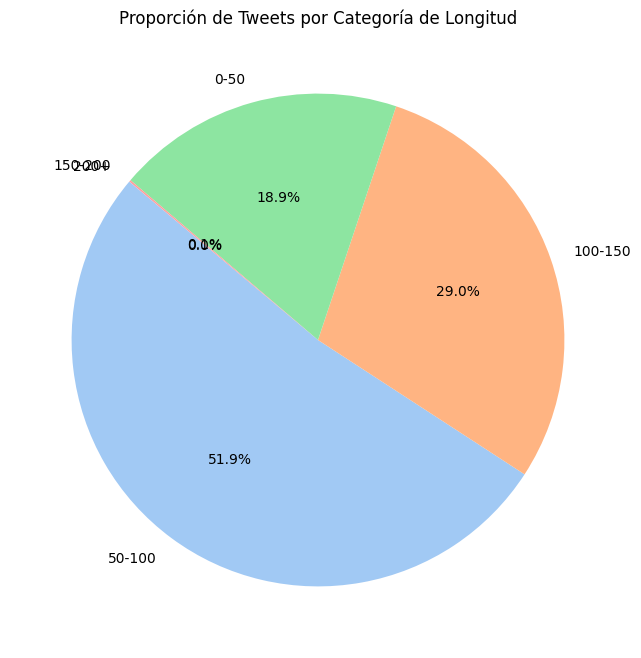

In [52]:
# Calcular la cantidad de tweets en cada categoría de longitud
length_category_counts = df['tweet_length_category'].value_counts()

# Crear un gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(length_category_counts, labels=length_category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporción de Tweets por Categoría de Longitud')
plt.show()

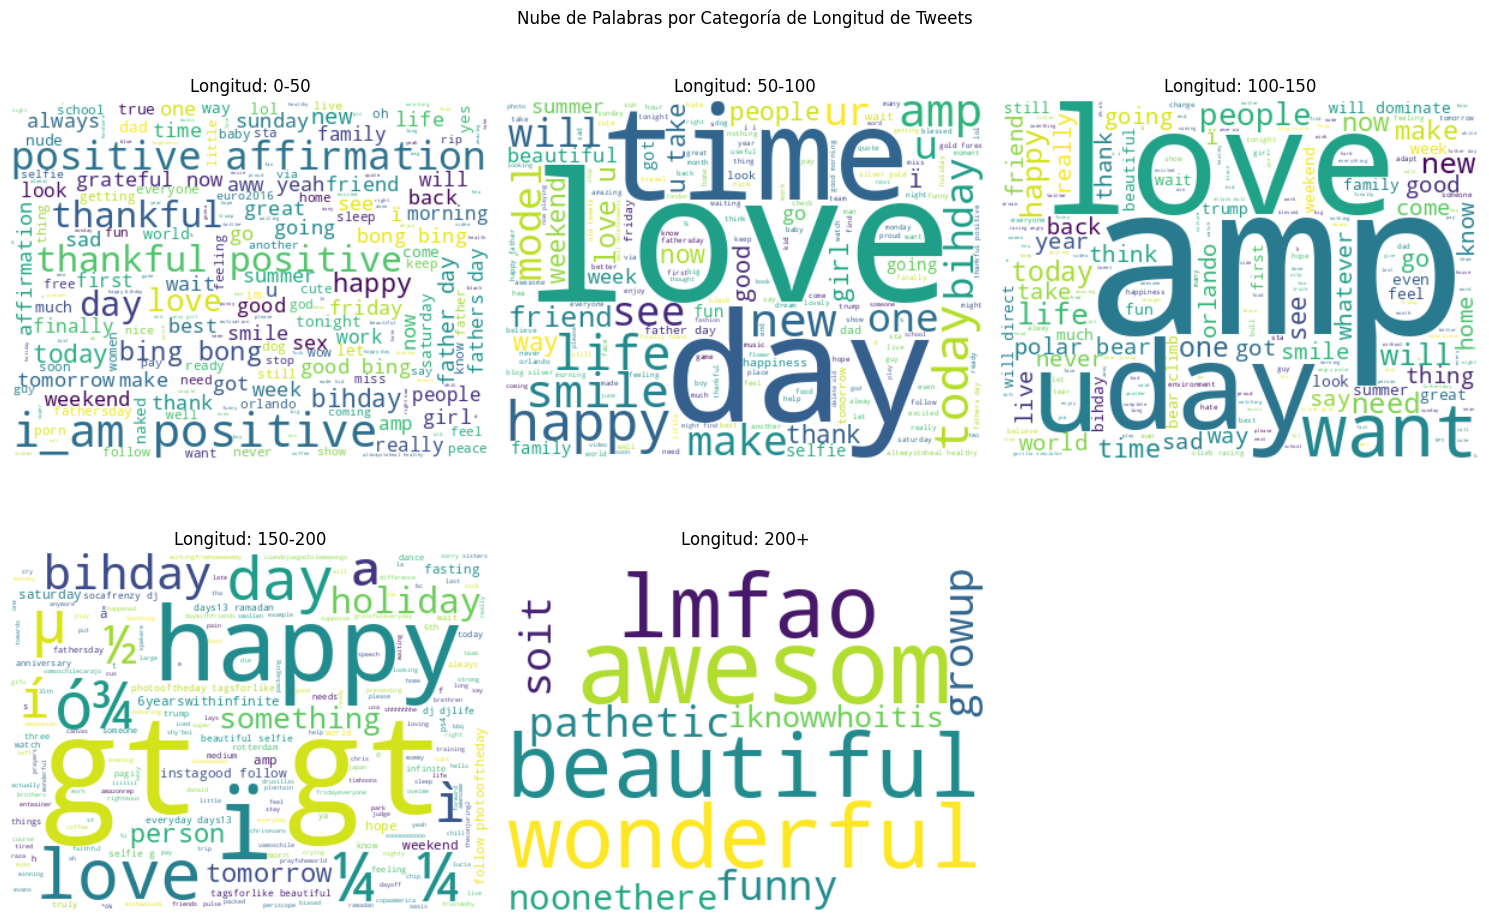

In [53]:
from collections import defaultdict

# Crear un diccionario para almacenar los tweets agrupados por categoría de longitud
tweets_by_length_category = defaultdict(str)

# Agrupar tweets por categoría de longitud
for category in labels:
    tweets = ' '.join(df[df['tweet_length_category'] == category]['tweet'])
    tweets_by_length_category[category] = tweets

# Crear nubes de palabras para cada categoría de longitud
plt.figure(figsize=(15, 10))
for i, category in enumerate(labels):
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(tweets_by_length_category[category])
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Longitud: {category}')
    plt.axis('off')
plt.suptitle('Nube de Palabras por Categoría de Longitud de Tweets')
plt.tight_layout()
plt.show()

**Entrenamiento del Modelo:** Entrenen un modelo de aprendizaje automático (Naive Bayes, SVM) para clasificar tweets en categorías de sentimiento.

In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

# Descargar recursos adicionales para NLTK
nltk.download('stopwords')

# Limpieza basica
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Aplicar preprocesamiento al DataFrame
df['processed_text'] = df['tweet'].apply(preprocess_text)

# Dividir los datos en características (X) y etiquetas (y)
X = df['processed_text']
y = df['sentiment']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline con TF-IDF y Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('nb', MultinomialNB())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = pipeline.predict(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Evaluación del Modelo:** Prueben el rendimiento del modelo con métricas como precisión, exactitud y F1-score.

In [60]:
# Evaluación del modelo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular métricas: precisión, recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Mostrar exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.2f}")


Reporte de clasificación:
              precision    recall  f1-score   support

    negative       0.81      0.43      0.56       962
     neutral       0.75      0.68      0.71      2215
    positive       0.75      0.90      0.82      3216

    accuracy                           0.75      6393
   macro avg       0.77      0.67      0.70      6393
weighted avg       0.76      0.75      0.74      6393


Precisión: 0.76
Recall: 0.75
F1-score: 0.74

Exactitud del modelo: 0.75
